*Ressources numériques – Programme BCPST2 2022*
---

# **Transformation modélisée par deux actes élémentaires successifs**

---

**Capacité numérique disciplinaire :** à l’aide d’un langage de programmation, tracer, dans le cas de deux actes élémentaires successifs, l’évolution des concentrations par résolution numérique du système d’équations différentielles et mettre en évidence les conditions d’application de l’approximation de l’état quasi-stationnaire.


---



# 1 - Présentation
---

Ce document s'intéresse à une transformation modélisée, à l'échelle microscopique, par deux actes élémentaires successifs monomoléculaires :

\begin{align}   
   \mathsf{ 
    A \xrightarrow{\text{$k_{1}$}} B\\ 
    B \xrightarrow{\text{$k_{2}$}} C     }
\end{align}

où $\mathsf{k_1}$ et $\mathsf{k_2}$ représentent les constantes de vitesse des deux actes élémentaires.

L'évolution temporelle des concentrations des espèces $\mathsf{A}$, $\mathsf{B}$ et $\mathsf{C}$ est régie par les équations différentielles suivantes :
\begin{equation}
\mathsf{
    \frac{d[A]}{dt} = -k_{1}[A] \\
    \frac{d[B]}{dt} = +k_{1}[A] - k_2 [B] \\
    \frac{d[C]}{dt} = + k_2 [B] \\
}
\end{equation}

### Notations
A l'état initial, la concentration de l'espèce $\mathsf{A}$ est notée $\mathsf{a}$, celle de l'espèce $\mathsf{B}$ est notée $\mathsf{b}$ et celle de l'espèce $\mathsf{C}$ est notée $\mathsf{c}$.



### Manipulation des scripts
Les paramètres suivants peuvent être modifiés : 
* les concentrations initiales des espèces $\mathsf{A}$, $\mathsf{B}$ et $\mathsf{C}$,
* les valeurs des constantes de vitesse (en particulier, pour tester les situations $\mathsf{k_2 << k_{1}}$ et $\mathsf{k_2 >> k_{1}}$,
* le pas de calcul et la durée d'intégration pour la méthode d'Euler.

Ces scripts peuvent être modifiés pour prévoir l'évolution de concentrations dans le cas de réactions modélisées par des actes élémentaires de molécularités différentes de 1.



---
# 2 - Script utilisant la méthode d'Euler 
---

La pméthode utilisée dans un premier temps pour intégrer l'équation différentielle est la méthode d'Euler. Celle-ci utilise la formule de Taylor qui permet d'écrire pour $\mathsf{h\to 0}$ :
\begin{equation}
    \mathsf{f(t_0+h)=f(t_0)+ \left(\frac{df}{dt}\right)_{t_0}\cdot h}
\end{equation}

Cette relation permet de calculer la concentration d'une espèce à un instant $\mathsf{t_0+h}$ connaissant sa valeur à l'instant $\mathsf{t_0}$ et la valeur de la dérivée à l'instant $\mathsf{t_0}$. Par exemple, pour la concentration de l'espèce $\mathsf{A}$ :
\begin{equation}
    \mathsf{[A]_{t_0+h}=[A]_{t_0}+ \left(\frac{d[A]}{dt}\right)_{t=t_0}  \cdot h}
\end{equation}

\begin{equation}
    \mathsf{[A]_{t_0+h}=[A]_{t_0}-k_1[A]_{t_0}  \cdot h}
\end{equation}

La méthode d'Euler nécessite :
* de connaître les valeurs initiales des grandeurs à intégrer (ici, $\mathsf{[A]}$, $\mathsf{[B]}$ et $\mathsf{[C]}$)
* d'utiliser un pas de calcul $\mathsf{h}$ petit.

En outre, sur le plan chimique, les concentrations des réactifs ne peuvent devenir négatives, ce qui impose une condition supplémentaire dans la boucle de calcul.

---

### Script Euler sans curseurs (version étudiants)


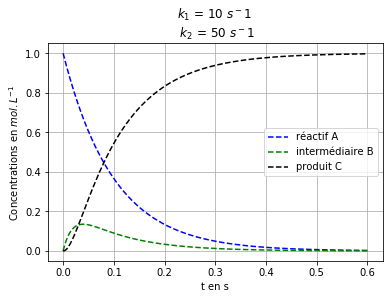

In [7]:
import matplotlib.pyplot as plt

# Conditions initiales    # en mol/L
a=1
b=0
c=0

# Paramètres de la méthode d'intégration
h=0.001      # pas temporel de calcul en s
duree = .6   # durée simulée totale en s

# Constantes de vitesse
k1=10        # en s^(-1)
k2=50        # en s^(-1)

# Listes des valeurs des concentrations et des instants t
LT=[0]
LA=[a]
LB=[b]
LC=[c]

# Boucle d'intégration

nbpts=duree/h    # nombre de points maximal
i=1
while i<=nbpts and LA[-1] >= 0 and LB[-1] >= 0 :
#la première condition évite que la boucle while n'ait pas de fin
#la seconde condition est d'origine chimique et arrête le calcul 
#dès que la concentration d'une espèce chimique devient négative 
#pour garder une simulation ayant un sens physique.
    A=LA[-1]         #utilise la dernière valeur de la liste LA
    B=LB[-1]   
    C=LC[-1]
    LT.append(i*h)   #ajoute une valeur à la liste des instants
    LA.append(A - k1*A*h)   #ajoute une valeur à la liste des concentrations 
                            #de l'espèce chimique A en tenant compte 
                            #de l'équation différentielle
    LB.append(B + k1*A*h - k2*B*h)
    LC.append(C+ k2*B*h)
    i=i+1


#Tracé des courbes des concentrations calculées en fonction du temps
plt.figure(1)
plt.title(f"$k_1$ = {k1} $s^{-1}$ \n $k_2$ = {k2} $s^{-1}$")
plt.plot(LT,LA,'b--', label='réactif A')
plt.plot(LT,LB,'g--', label='intermédiaire B')
plt.plot(LT,LC,'k--', label='produit C')
plt.xlabel('t en s')
plt.ylabel('Concentrations en $mol.L^{-1}$')
plt.grid()
plt.legend()

## Script Euler avec curseurs (version professeur)

Le script est le même que celui présenté à l'étape précédente. Les commandes sont désormais incluses au sein d'un programme qui génère des curseurs pouvant être manipulés pour illustrer diverses situations ayant trait aux importances relatives des constantes de vitesse des deux actes élémentaires.
Ce code ne fonctionne que dans le cadre d'un notebook Jupyter.

In [8]:
import matplotlib.pyplot as plt
from ipywidgets import interact

"""Conditions initiales"""    # en mol/L
a=1
b=0
c=0

"""Paramètres de la méthode d'intégration"""
h=0.001      # pas temporel de calcul en s
duree = .6   # durée simulée totale en s


def AEQS_Euler(r) :
    # r représente le rapport des valeurs des constantes de vitesse r = k2/k1
 
    """Constantes de vitesse"""
    k1=10        # en s^(-1)
    k2 = r * k1

    """Listes des valeurs des concentrations et des instants t"""
    LT=[0]
    LA=[a]
    LB=[b]
    LC=[c]
   
    """ Boucle d'intégration"""
    nbpts=duree/h    # nombre de points maximal
    i=1
    while i<=nbpts and LA[-1] >= 0 and LB[-1] >= 0 :
        A=LA[-1]
        B=LB[-1]   
        C=LC[-1]
        LT.append(i*h)
        LA.append(A - k1*A*h)
        LB.append(B + k1*A*h - k2*B*h)
        LC.append(C+ k2*B*h)
        i=i+1

    """Tracé des courbes des concentrations calculées en fonction du temps"""
    plt.figure(1)
    plt.plot(LT,LA,'b--', label='réactif A')
    plt.plot(LT,LB,'g--', label='intermédiaire B')
    plt.plot(LT,LC,'k--', label='produit C')
    plt.xlabel('t en s')
    plt.ylabel('Concentrations en $mol.L^{-1}$')
    plt.title(f"Cas où k2 = {r} k1")
    plt.grid()
    plt.legend()

interact (AEQS_Euler, r = [.1, 1, 2,10,50])

interactive(children=(Dropdown(description='r', options=(0.1, 1, 2, 10, 50), value=0.1), Output()), _dom_class…

<function __main__.AEQS_Euler(r)>

---
# 3 - Scripts utilisant `odeint`
---


### Script `odeint` sans curseur (version étudiant)

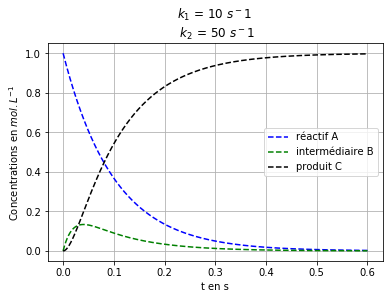

In [9]:
## Importation des bibliothèques
import matplotlib.pyplot as plt
from numpy import linspace
from scipy.integrate import odeint

## Conditions initiales    # en mol/L
a=1
b=0
c=0

## Paramètres de la méthode d'intégration
duree = .6   # durée simulée totale en s

## Constantes de vitesse
k1=10        # en s^(-1)
k2=50        # en s^(-1)


## Procédure d'intégration
t = linspace(0,duree,2000)   #Création d'une liste de valeurs d'abscisses

def f(Z,t) :
  A,B,C = Z
  return - k1*A , k1*A - k2*B , k2*B
    
resultat = odeint(f,[a,b,c],t)
    
A = resultat[:,0]
B = resultat[:,1]
C = resultat[:,2]


## Tracé des courbes des concentrations calculées en fonction du temps
plt.figure(1)
plt.title(f"$k_1$ = {k1} $s^{-1}$ \n $k_2$ = {k2} $s^{-1}$")
plt.plot(t,A,'b--', label='réactif A')
plt.plot(t,B,'g--', label='intermédiaire B')
plt.plot(t,C,'k--', label='produit C')
plt.xlabel('t en s')
plt.ylabel('Concentrations en $mol.L^{-1}$')
plt.grid()
plt.legend()

### Script `odeint` avec curseur (version professeur)

Le script est le même que celui présenté à l'étape précédente. Les commandes sont désormais incluses au sein d'un programme qui génère des curseurs pouvant être manipulés pour illustrer diverses situations ayant trait aux importances relatives des constantes de vitesse des deux actes élémentaires.
Ce code ne fonctionne que dans le cadre d'un notebook Jupyter.

In [10]:
## Importation des bibliothèques
import matplotlib.pyplot as plt
from numpy import linspace
from scipy.integrate import odeint
from ipywidgets import interact

# Conditions initiales"""    # en mol/L
a=1
b=0
c=0


def AEQS_Odeint(r) :
    
    ## Paramètres de la méthode d'intégration
    duree = .6   # durée simulée totale en s

    ## Constantes de vitesse
    k1 = 10        # en s^(-1)
    k2 = r * k1    # en s^(-1)


    ## Procédure d'intégration
    t = linspace(0,duree,2000)   #Création d'une liste de valeurs d'abscisses

    def f(Z,t) :
      A,B,C = Z
      return - k1*A , k1*A - k2*B , k2*B

    resultat = odeint(f,[a,b,c],t)

    A = resultat[:,0]
    B = resultat[:,1]
    C = resultat[:,2]


    ## Tracé des courbes des concentrations calculées en fonction du temps
    plt.figure(1)
    plt.title(f"$k_1$ = {k1} $s^{-1}$ \n $k_2$ = {k2} $s^{-1}$")
    plt.plot(t,A,'b--', label='réactif A')
    plt.plot(t,B,'g--', label='intermédiaire B')
    plt.plot(t,C,'k--', label='produit C')
    plt.xlabel('t en s')
    plt.ylabel('Concentrations en $mol.L^{-1}$')
    plt.grid()
    plt.legend()

interact (AEQS_Odeint, r = [.1, 1, 2,10,50])

interactive(children=(Dropdown(description='r', options=(0.1, 1, 2, 10, 50), value=0.1), Output()), _dom_class…

<function __main__.AEQS_Odeint(r)>

---
# 4 - Conclusion
---

Lorsque $\mathsf{k_2 >> k_{1}}$, l'intermédiaire réactionnel ne s'accumule pas. 
Sa concentration varie beaucoup plus lentement que celles des autres espèces chimiques.
\begin{equation}
\mathsf{
    \frac{d[B]}{dt} << {\left|\frac{d[A]}{dt}\right|,\frac{d[C]}{dt}} \\ \frac{d[B]}{dt} \approx 0
}
 \end{equation}